# [ICTCOG] 4기 경북대 기본반

## 딥러닝 (5)

### Overfitting

참고: https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko

In [1]:
from sklearn.datasets import load_digits

In [2]:
data=load_digits()

In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
data.images.shape

(1797, 8, 8)

In [5]:
import matplotlib.pyplot as plt

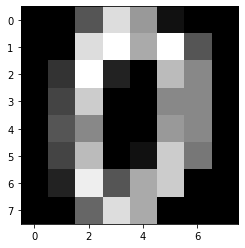

In [9]:
plt.imshow(data.images[0],cmap='gray')

- pandas에 넣는것은 의미가 없음
- 이미지는 비정형 데이터
     순서

In [11]:
data.images.reshape(-1,8*8).shape

(1797, 64)

In [13]:
digit=data.images.reshape(-1,8*8)
digit

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test, y_train,y_test = train_test_split(digit, data.target)

In [16]:
import tensorflow as tf

In [27]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=(64,),activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
import numpy as np

In [19]:
np.unique(y_train, return_counts=True) #balanced dataset

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([132, 133, 133, 139, 132, 138, 137, 141, 133, 129]))

stratification 

In [20]:
import mglearn

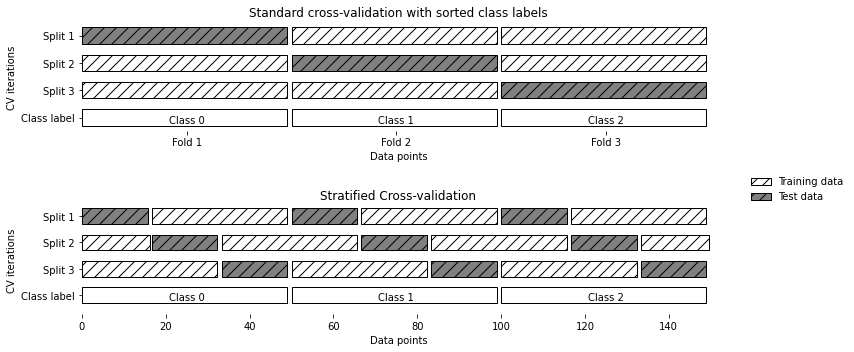

In [21]:
mglearn.plot_cross_validation.plot_stratified_cross_validation()

In [22]:
from tensorflow.keras.utils import plot_model

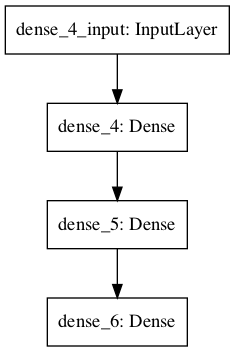

In [28]:
plot_model(model) 

In [38]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=(64,),activation='relu',
                         name='Start'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

    
], name='classification_model')

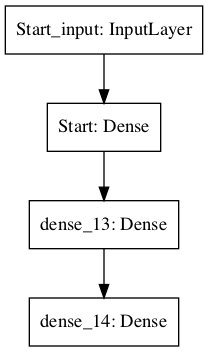

In [39]:
plot_model(model) 

In [40]:
model.summary()

Model: "classification_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Start (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                170       
Total params: 1,482
Trainable params: 1,482
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy)

### one-hot encoding
- to_categorical

In [70]:
y_train=tf.keras.utils.to_categorical(y_train) 
y_train#
y_test=tf.keras.utils.to_categorical(y_test) 

- string, function , class 섞어 씀
- 정확도 acc, accuracy

In [47]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer='adam',
             metrics=['acc'])

정확도 0

In [48]:
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
43/43 [==============================] - 0s 2ms/step - loss: 0.3337 - acc: 0.9117
Epoch 2/10
43/43 [==============================] - 0s 2ms/step - loss: 0.2897 - acc: 0.9169
Epoch 3/10
43/43 [==============================] - 0s 2ms/step - loss: 0.2536 - acc: 0.9310
Epoch 4/10
43/43 [==============================] - 0s 2ms/step - loss: 0.2349 - acc: 0.9310
Epoch 5/10
43/43 [==============================] - 0s 2ms/step - loss: 0.2188 - acc: 0.9414
Epoch 6/10
43/43 [==============================] - 0s 2ms/step - loss: 0.1949 - acc: 0.9436
Epoch 7/10
43/43 [==============================] - 0s 2ms/step - loss: 0.1758 - acc: 0.9495
Epoch 8/10
43/43 [==============================] - 0s 2ms/step - loss: 0.1712 - acc: 0.9495
Epoch 9/10
43/43 [==============================] - 0s 2ms/step - loss: 0.1522 - acc: 0.9599
Epoch 10/10
43/43 [==============================] - 0s 2ms/step - loss: 0.1408 - acc: 0.9614


- callbacks `out[]: <tensorflow.python.keras.callbacks.History at 0x7fbe85ffeb0>`



In [49]:
0.1+0.1+0.1 #부동소수점이 너무 작으면 정확이 못함

0.30000000000000004

In [51]:
output=model.fit(X_train,y_train, epochs=10)

Epoch 1/10
43/43 [==============================] - 0s 2ms/step - loss: 0.1297 - acc: 0.9651
Epoch 2/10
43/43 [==============================] - 0s 2ms/step - loss: 0.1219 - acc: 0.9673
Epoch 3/10
43/43 [==============================] - 0s 2ms/step - loss: 0.1124 - acc: 0.9703
Epoch 4/10
43/43 [==============================] - 0s 3ms/step - loss: 0.1048 - acc: 0.9718
Epoch 5/10
43/43 [==============================] - 0s 3ms/step - loss: 0.1053 - acc: 0.9703
Epoch 6/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0925 - acc: 0.9733
Epoch 7/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0857 - acc: 0.9755
Epoch 8/10
43/43 [==============================] - 0s 2ms/step - loss: 0.0814 - acc: 0.9777
Epoch 9/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0778 - acc: 0.9800
Epoch 10/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0715 - acc: 0.9852


In [52]:
dir(output)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

history 
- loss 기본, metrics에 지정된 기준 포함
- loss,acc 값 저장됨

In [53]:
output.history 

{'loss': [0.12974093854427338,
  0.12189016491174698,
  0.11242817342281342,
  0.10480349510908127,
  0.1053435206413269,
  0.09251584857702255,
  0.08569823950529099,
  0.08144153654575348,
  0.07775504142045975,
  0.07153461873531342],
 'acc': [0.9651076197624207,
  0.9673348069190979,
  0.9703043699264526,
  0.9717891812324524,
  0.9703043699264526,
  0.9732739329338074,
  0.9755011200904846,
  0.9777283072471619,
  0.9799554347991943,
  0.9851521849632263]}

누적 학습되어서 정확도 1에 가까워짐

In [55]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer='adam',
             metrics=['acc', tf.keras.metrics.Precision()])

output=model.fit(X_train,y_train, epochs=10)

Epoch 1/10
43/43 [==============================] - 0s 2ms/step - loss: 0.0716 - acc: 0.9792 - precision_3: 0.9850
Epoch 2/10
43/43 [==============================] - 0s 2ms/step - loss: 0.0646 - acc: 0.9837 - precision_3: 0.9888
Epoch 3/10
43/43 [==============================] - 0s 2ms/step - loss: 0.0606 - acc: 0.9814 - precision_3: 0.9851
Epoch 4/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0552 - acc: 0.9866 - precision_3: 0.9888
Epoch 5/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0536 - acc: 0.9859 - precision_3: 0.9895
Epoch 6/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0481 - acc: 0.9866 - precision_3: 0.9903
Epoch 7/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0437 - acc: 0.9874 - precision_3: 0.9888
Epoch 8/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0475 - acc: 0.9837 - precision_3: 0.9873
Epoch 9/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0364 -

In [56]:
output.history

{'loss': [0.0715562030673027,
  0.06463948637247086,
  0.060552000999450684,
  0.055181145668029785,
  0.05364129692316055,
  0.048117849975824356,
  0.04367369785904884,
  0.047528788447380066,
  0.036354247480630875,
  0.03088371455669403],
 'acc': [0.9792130589485168,
  0.9836674332618713,
  0.9814402461051941,
  0.9866369962692261,
  0.9858945608139038,
  0.9866369962692261,
  0.9873793721199036,
  0.9836674332618713,
  0.9903489351272583,
  0.9940608739852905],
 'precision_3': [0.985029935836792,
  0.9887808561325073,
  0.9850746393203735,
  0.9888226389884949,
  0.9895287752151489,
  0.9902985095977783,
  0.9888392686843872,
  0.9872944951057434,
  0.992548406124115,
  0.995529055595398]}

### overfitting
- epoch을 많이 돌리는 경우

In [57]:
output=model.fit(X_train,y_train, epochs=10)

Epoch 1/10
43/43 [==============================] - 0s 2ms/step - loss: 0.0304 - acc: 0.9918 - precision_3: 0.9955
Epoch 2/10
43/43 [==============================] - 0s 2ms/step - loss: 0.0251 - acc: 0.9955 - precision_3: 0.9970
Epoch 3/10
43/43 [==============================] - 0s 2ms/step - loss: 0.0239 - acc: 0.9963 - precision_3: 0.9970
Epoch 4/10
43/43 [==============================] - 0s 2ms/step - loss: 0.0236 - acc: 0.9963 - precision_3: 0.9978
Epoch 5/10
43/43 [==============================] - 0s 3ms/step - loss: 0.0210 - acc: 0.9955 - precision_3: 0.9955
Epoch 6/10
43/43 [==============================] - 0s 2ms/step - loss: 0.0176 - acc: 0.9978 - precision_3: 0.9978
Epoch 7/10
43/43 [==============================] - 0s 2ms/step - loss: 0.0153 - acc: 0.9993 - precision_3: 0.9993
Epoch 8/10
43/43 [==============================] - 0s 2ms/step - loss: 0.0151 - acc: 0.9978 - precision_3: 0.9985
Epoch 9/10
43/43 [==============================] - 0s 2ms/step - loss: 0.0138 -

긱 레이어, 모델에 이름 지정 가능

In [62]:
def build_model():
    model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=(64,),activation='relu',
                         name='Start'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='classification_model')
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer='adam',
             metrics=['acc'])
    return model
model=build_model()
output=model.fit(X_train,y_train, epochs=10)

Epoch 1/10
43/43 [==============================] - 0s 4ms/step - loss: 6.2348 - acc: 0.1121
Epoch 2/10
43/43 [==============================] - 0s 2ms/step - loss: 2.4312 - acc: 0.1908
Epoch 3/10
43/43 [==============================] - 0s 2ms/step - loss: 1.9841 - acc: 0.3289
Epoch 4/10
43/43 [==============================] - 0s 3ms/step - loss: 1.7447 - acc: 0.4439
Epoch 5/10
43/43 [==============================] - 0s 2ms/step - loss: 1.4617 - acc: 0.5286
Epoch 6/10
43/43 [==============================] - 0s 2ms/step - loss: 1.2298 - acc: 0.6028
Epoch 7/10
43/43 [==============================] - 0s 2ms/step - loss: 1.0167 - acc: 0.6711
Epoch 8/10
43/43 [==============================] - 0s 2ms/step - loss: 0.8489 - acc: 0.7246
Epoch 9/10
43/43 [==============================] - 0s 2ms/step - loss: 0.6978 - acc: 0.7721
Epoch 10/10
43/43 [==============================] - 0s 2ms/step - loss: 0.5499 - acc: 0.8285


In [63]:
output.history

{'loss': [6.234816551208496,
  2.4312238693237305,
  1.9841344356536865,
  1.7446550130844116,
  1.4616918563842773,
  1.2298015356063843,
  1.0166774988174438,
  0.8489134907722473,
  0.6978368759155273,
  0.5498645305633545],
 'acc': [0.11210096627473831,
  0.19079436361789703,
  0.3288789987564087,
  0.44394952058792114,
  0.5285820364952087,
  0.6028211116790771,
  0.6711210012435913,
  0.7245731353759766,
  0.7720861434936523,
  0.8285077810287476]}

In [64]:
import pandas as pd
pd.DataFrame(output.history)

,loss,acc
0,6.234817,0.112101
1,2.431224,0.190794
2,1.984134,0.328879
3,1.744655,0.443950
4,1.461692,0.528582
5,1.229802,0.602821
6,1.016677,0.671121
7,0.848913,0.724573
8,0.697837,0.772086
9,0.549865,0.828508


training accuracy, loss 만으로는 overfitting인지 알 수 없음

<AxesSubplot:>

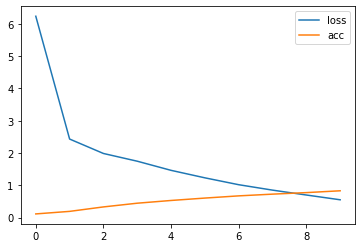

In [66]:
pd.DataFrame(output.history).plot.line()

In [67]:
model=build_model()
output=model.fit(X_train,y_train, epochs=10,validation_split=0.2)

Epoch 1/10
34/34 [==============================] - 1s 36ms/step - loss: 4.5582 - acc: 0.0891 - val_loss: 2.6870 - val_acc: 0.1630
Epoch 2/10
34/34 [==============================] - 0s 4ms/step - loss: 2.3553 - acc: 0.1968 - val_loss: 1.9449 - val_acc: 0.3148
Epoch 3/10
34/34 [==============================] - 0s 3ms/step - loss: 1.8491 - acc: 0.3565 - val_loss: 1.6443 - val_acc: 0.4185
Epoch 4/10
34/34 [==============================] - 0s 6ms/step - loss: 1.5081 - acc: 0.4726 - val_loss: 1.3634 - val_acc: 0.5222
Epoch 5/10
34/34 [==============================] - 0s 3ms/step - loss: 1.2282 - acc: 0.5859 - val_loss: 1.0933 - val_acc: 0.6481
Epoch 6/10
34/34 [==============================] - 0s 3ms/step - loss: 0.9843 - acc: 0.6778 - val_loss: 0.9198 - val_acc: 0.7037
Epoch 7/10
34/34 [==============================] - 0s 3ms/step - loss: 0.8095 - acc: 0.7372 - val_loss: 0.7856 - val_acc: 0.7630
Epoch 8/10
34/34 [==============================] - 0s 3ms/step - loss: 0.6700 - acc: 0.7

<AxesSubplot:>

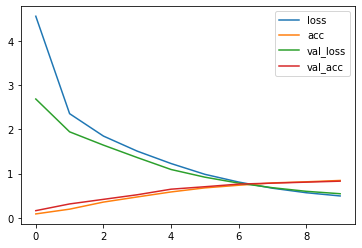

In [68]:
pd.DataFrame(output.history).plot.line()

In [71]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.4859 - acc: 0.8422


[0.4858657419681549, 0.8422222137451172]

- perceptron의 노드 크기를 늘림

In [83]:
def build_model():
    model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, input_shape=(64,),activation='relu',
                         name='Start'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

    
], name='classification_model')
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer='adam',
             metrics=['acc'])
    return model
model=build_model()
output=model.fit(X_train,y_train, epochs=10,validation_split=0.2)

Epoch 1/10
34/34 [==============================] - 1s 15ms/step - loss: 0.8847 - acc: 0.7669 - val_loss: 0.3924 - val_acc: 0.8778
Epoch 2/10
34/34 [==============================] - 0s 8ms/step - loss: 0.1552 - acc: 0.9536 - val_loss: 0.1311 - val_acc: 0.9556
Epoch 3/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0424 - acc: 0.9898 - val_loss: 0.1168 - val_acc: 0.9667
Epoch 4/10
34/34 [==============================] - 0s 7ms/step - loss: 0.0173 - acc: 0.9972 - val_loss: 0.0905 - val_acc: 0.9778
Epoch 5/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0112 - acc: 0.9991 - val_loss: 0.0722 - val_acc: 0.9852
Epoch 6/10
34/34 [==============================] - 0s 7ms/step - loss: 0.0071 - acc: 0.9981 - val_loss: 0.0861 - val_acc: 0.9778
Epoch 7/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.0797 - val_acc: 0.9741
Epoch 8/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0021 - acc: 1.0

In [84]:
pd.DataFrame(output.history)

,loss,acc,val_loss,val_acc
0,0.884685,0.766945,0.392438,0.877778
1,0.155162,0.953575,0.131125,0.955556
2,0.042381,0.989786,0.116789,0.966667
3,0.017332,0.997214,0.090499,0.977778
4,0.011154,0.999071,0.072156,0.985185
5,0.007053,0.998143,0.086143,0.977778
6,0.005805,1.000000,0.079673,0.974074
7,0.002118,1.000000,0.064577,0.985185
8,0.001473,1.000000,0.064131,0.988889
9,0.001103,1.000000,0.066260,0.988889


<AxesSubplot:>

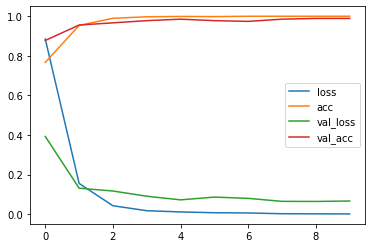

In [85]:
pd.DataFrame(output.history).plot.line()

In [86]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 4ms/step - loss: 0.0728 - acc: 0.9800


[0.07283001393079758, 0.9800000190734863]

레이어 추가

- 성능향상은 perceptron 갯수보다 레이어 늘리는게 더 효과 있음
- activaiton function의 비선형성 증가

In [87]:
def build_model():
    model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, input_shape=(64,),activation='relu',
                         name='Start'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

    
], name='classification_model')
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer='adam',
             metrics=['acc'])
    return model
model=build_model()
output=model.fit(X_train,y_train, epochs=10,validation_split=0.2)

Epoch 1/10
34/34 [==============================] - 1s 20ms/step - loss: 0.7709 - acc: 0.7976 - val_loss: 0.1801 - val_acc: 0.9407
Epoch 2/10
34/34 [==============================] - 0s 12ms/step - loss: 0.1112 - acc: 0.9647 - val_loss: 0.0864 - val_acc: 0.9741
Epoch 3/10
34/34 [==============================] - 0s 11ms/step - loss: 0.0564 - acc: 0.9796 - val_loss: 0.0633 - val_acc: 0.9815
Epoch 4/10
34/34 [==============================] - 0s 11ms/step - loss: 0.0330 - acc: 0.9907 - val_loss: 0.0707 - val_acc: 0.9778
Epoch 5/10
34/34 [==============================] - 0s 14ms/step - loss: 0.0084 - acc: 0.9991 - val_loss: 0.0434 - val_acc: 0.9889
Epoch 6/10
34/34 [==============================] - 1s 15ms/step - loss: 0.0101 - acc: 0.9972 - val_loss: 0.0699 - val_acc: 0.9704
Epoch 7/10
34/34 [==============================] - 0s 11ms/step - loss: 0.0042 - acc: 0.9991 - val_loss: 0.0633 - val_acc: 0.9741
Epoch 8/10
34/34 [==============================] - 0s 12ms/step - loss: 0.0058 - a

In [88]:
pd.DataFrame(output.history)

,loss,acc,val_loss,val_acc
0,0.770873,0.797586,0.180095,0.940741
1,0.111178,0.964717,0.086430,0.974074
2,0.056362,0.979573,0.063258,0.981481
3,0.032957,0.990715,0.070693,0.977778
4,0.008366,0.999071,0.043432,0.988889
5,0.010094,0.997214,0.069914,0.970370
6,0.004239,0.999071,0.063310,0.974074
7,0.005786,0.999071,0.070148,0.981481
8,0.002083,1.000000,0.080871,0.985185
9,0.000684,1.000000,0.069383,0.985185


<AxesSubplot:>

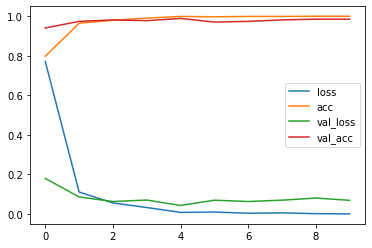

In [89]:
pd.DataFrame(output.history).plot.line()

In [90]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 3ms/step - loss: 0.0694 - acc: 0.9822


[0.06941625475883484, 0.9822221994400024]

Epoch 1/10
34/34 [==============================] - 0s 8ms/step - loss: 8.9658e-04 - acc: 1.0000 - val_loss: 0.0537 - val_acc: 0.9852
Epoch 2/10
34/34 [==============================] - 0s 6ms/step - loss: 7.6082e-04 - acc: 1.0000 - val_loss: 0.0574 - val_acc: 0.9815
Epoch 3/10
34/34 [==============================] - 0s 9ms/step - loss: 7.0631e-04 - acc: 1.0000 - val_loss: 0.0540 - val_acc: 0.9852
Epoch 4/10
34/34 [==============================] - 0s 8ms/step - loss: 6.0202e-04 - acc: 1.0000 - val_loss: 0.0519 - val_acc: 0.9852
Epoch 5/10
34/34 [==============================] - 0s 12ms/step - loss: 5.6165e-04 - acc: 1.0000 - val_loss: 0.0558 - val_acc: 0.9815
Epoch 6/10
34/34 [==============================] - 0s 8ms/step - loss: 5.0332e-04 - acc: 1.0000 - val_loss: 0.0536 - val_acc: 0.9852
Epoch 7/10
34/34 [==============================] - 0s 11ms/step - loss: 4.4738e-04 - acc: 1.0000 - val_loss: 0.0530 - val_acc: 0.9815
Epoch 8/10
34/34 [==============================] - 0s 9ms/s

<AxesSubplot:>

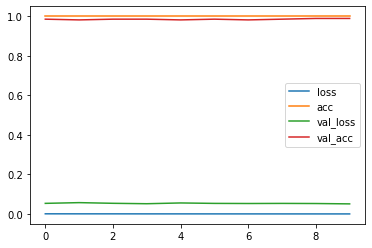

In [95]:
output=model.fit(X_train,y_train, epochs=10,validation_split=0.2)
pd.DataFrame(output.history).plot.line()

### EarlyStopping 
callback이용해서 overfitting 방지
- validation loss의 변화가 크지않으면 epoch이 다 돌지 않더라고 미리 종료 시킴

In [ ]:
tf.keras.callbacks.EarlyStopping

In [96]:
output=model.fit(X_train,y_train, epochs=100,
                 callbacks=[tf.keras.callbacks.EarlyStopping()],
                 validation_split=0.2)
#3번째에 끝남

Epoch 1/100
34/34 [==============================] - 0s 8ms/step - loss: 3.0598e-04 - acc: 1.0000 - val_loss: 0.0526 - val_acc: 0.9889
Epoch 2/100
34/34 [==============================] - 0s 9ms/step - loss: 2.7816e-04 - acc: 1.0000 - val_loss: 0.0518 - val_acc: 0.9889
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 2.5670e-04 - acc: 1.0000 - val_loss: 0.0535 - val_acc: 0.9889


 ### model 

In [97]:
model.weights #kernel w, bias b

[<tf.Variable 'Start/kernel:0' shape=(64, 512) dtype=float32, numpy=
 array([[ 0.07522076, -0.0028543 ,  0.0630039 , ..., -0.03261586,
         -0.06845564, -0.08198256],
        [ 0.08972901,  0.02173909,  0.07108444, ...,  0.00164415,
         -0.04945736,  0.03130922],
        [-0.00331162, -0.08826502, -0.05673114, ..., -0.00900054,
         -0.11149822, -0.0761652 ],
        ...,
        [-0.05948605, -0.05653155,  0.08638254, ...,  0.03720778,
          0.11040892,  0.10657255],
        [ 0.06511578, -0.00302147, -0.07125143, ...,  0.05700338,
          0.07436255, -0.02284284],
        [ 0.02321933,  0.04218322,  0.03489282, ...,  0.04827485,
         -0.07482266, -0.04359617]], dtype=float32)>,
 <tf.Variable 'Start/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 0.00000000e+00, -1.13827046e-02,  1.67666227e-02, -5.11324313e-03,
         1.54776312e-03,  8.20553768e-03,  6.36478793e-03, -1.50804920e-03,
         3.44332284e-03, -6.47032913e-03, -2.26484123e-03, -4.14832449e-

In [98]:
model.layers #list

In [100]:
X_test[0].shape

(64,)

In [105]:
X_train.shape

(1347, 64)

In [110]:
X_test[0][tf.newaxis].shape

(1, 64)

In [108]:
tf.expand_dims(X_test[0],axis=0).shape

TensorShape([1, 64])

In [112]:
X_test[0].reshape(1,-1)

array([[ 0.,  0.,  9., 15., 13.,  3.,  0.,  0.,  0.,  2., 14.,  2.,  6.,
         5.,  0.,  0.,  0.,  4.,  9.,  0.,  0., 15.,  4.,  0.,  0.,  1.,
        13.,  5.,  7., 16.,  6.,  0.,  0.,  0.,  2.,  7.,  7., 14.,  3.,
         0.,  0.,  0.,  0.,  0.,  1., 14.,  1.,  0.,  0.,  0.,  3.,  1.,
        10.,  9.,  0.,  0.,  0.,  0., 11., 15.,  9.,  1.,  0.,  0.]])

In [104]:
model.predict(X_test[0][tf.newaxis])

array([[2.0591682e-04, 4.2728905e-09, 1.6881270e-07, 2.3712648e-05,
        1.4397812e-06, 1.1360009e-03, 1.8451265e-09, 2.2643226e-06,
        2.2157279e-05, 9.9860841e-01]], dtype=float32)

In [103]:
model.summary()

Model: "classification_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Start (Dense)                (None, 512)               33280     
_________________________________________________________________
dense_30 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_31 (Dense)             (None, 10)                5130      
Total params: 301,066
Trainable params: 301,066
Non-trainable params: 0
_________________________________________________________________


In [113]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

함수형 패러다임
- 행렬 연산을 위해서 함수처럼 사용
- __call__ 정의됨 

이해용

In [114]:
class X:
    def __init__(self):
        print('init')
    def __call__(self):
        print('call')        

In [115]:
x=X()

init


In [116]:
x()

call


In [118]:
model.layers[0]

In [119]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(1,input_shape=(3,),use_bias=False)
])

In [123]:
import numpy as np
x=np.array([[1,2,3]])

In [124]:
model(x) #결과 1개 0.5597379

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.5597379]], dtype=float32)>

In [125]:
model.weights

[<tf.Variable 'dense_32/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[ 1.0118102],
        [ 0.9262997],
        [-0.7682238]], dtype=float32)>,
 <tf.Variable 'dense_32/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [127]:
x @ np.array([[ 1.0118102],
        [ 0.9262997],
        [-0.7682238]])

array([[0.5597382]])

In [131]:
np.ones([3,4])

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [145]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(2,input_shape=(4,),
                          kernel_initializer= 'ones',use_bias=True)
])

In [146]:
x=np.array([[1,2,3,4],[1,2,3,4]])
model(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[10., 10.],
       [10., 10.]], dtype=float32)>

In [147]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(2,input_shape=(4,),
                          kernel_initializer= 'ones',use_bias=True,
                         activation='relu')
])

In [148]:
x=np.array([[1,-2,3,-4],[-1,2,-3,4]])
model(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [2., 2.]], dtype=float32)>

In [155]:
x@np.ones((4,2)) #relu는 - 인경우 0 , 양수는 그값 그대로

array([[-2., -2.],
       [ 2.,  2.]])

In [157]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(2,input_shape=(4,),
                          kernel_initializer= 'ones',use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu')
  
])

Sequential 
- 단반향
- Model로 부터 상속받음
- Input 써머리에 나오지 않음

In [170]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),    
    tf.keras.layers.Dense(10, activation='softmax')

    
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_69 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_70 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_71 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_72 (Dense)             (None, 10)                5130      
Total params: 826,378
Trainable params: 826,378
Non-trainable params: 0
_________________________________________________________________


In [159]:
issubclass(tf.keras.models.Sequential , tf.keras.models.Model)

True

In [160]:
tf.keras.models.Sequential.__bases__

(tensorflow.python.keras.engine.functional.Functional,)

Model
- 다중 inputs,outputs으로 복잡한 구조를 만들 수 있음
- 함수형 패러다임 `__call__`

- Input 레이어에 output shape [] list 

In [163]:
inputs=tf.keras.layers.Input(shape=(64,))
x= tf.keras.layers.Dense(512,activation='relu')(inputs)
x= tf.keras.layers.Dense(512,activation='relu')(x)
x= tf.keras.layers.Dense(512,activation='relu')(x)
x= tf.keras.layers.Dense(512,activation='relu')(x)
outputs=tf.keras.layers.Dense(10)(x)

model2=tf.keras.models.Model(inputs=inputs, outputs=outputs)


In [164]:
model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_49 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_50 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_51 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_52 (Dense)             (None, 10)                5130      
Total params: 826,378
Trainable params: 826,378
Non-trainable params: 0
________________________________________________

dense 는 2개를 받지 못함

In [168]:
inputs_1=tf.keras.layers.Input(shape=(64,))
inputs_2=tf.keras.layers.Input(shape=(64,))

x= tf.keras.layers.Concatenate()([inputs_1,inputs_2])
x= tf.keras.layers.Dense(512,activation='relu')(x)
x= tf.keras.layers.Dense(512,activation='relu')(x)
x= tf.keras.layers.Dense(512,activation='relu')(x)
x= tf.keras.layers.Dense(512,activation='relu')(x)
outputs=tf.keras.layers.Dense(10)(x)


연습
- Sequential에서 3개

- 참고 :https://www.tensorflow.org/tutorials/keras/regression

In [ ]:
inputs=tf.keras.layers.Input(shape=(64,))
x= tf.keras.layers.Dense(64,activation='relu')(inputs)
x= tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1)(x)

In [ ]:
복잡한 모델은 Model로 시작

In [ ]:
m=tf.keras.applications.mobilenet_v2
from tensorflow.keras.utils import plot_model
plot_model(m)

In [ ]:
m.summary() #Connected to

나중에는 모델을 서브클래싱 해야함

In [ ]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyModel()